# Laboration 1 – Covid-19  

# Uppgift 1 - uppvärmning covid-19 data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
from datetime import datetime

ModuleNotFoundError: No module named 'plotly_express'

In [12]:

# Data was downloaded from the link address: 
# https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
import pandas as pd
Covid19=pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx",sheet_name=8) # Read ninth sheet_name, It can use str"Veckodata Riket"också.
Covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


# a)
Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.

In [13]:
Covid19.shape

(89, 13)

In [14]:
Covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [15]:
Covid19.isnull().sum() # output showing no missing values, which is very good !

år                                0
veckonummer                       0
Antal_fall_vecka                  0
Antal_fall_100000inv_vecka        0
Antal_fall_100000inv_14dagar      0
Kum_antal_fall                    0
Kum_fall_100000inv                0
Antal_nyaintensivvårdade_vecka    0
Kum_antal_intensivvårdade         0
Antal_avlidna_vecka               0
Antal_avlidna_milj_inv_vecka      0
Kum_antal_avlidna                 0
Kum_antal_avlidna_milj_inv        0
dtype: int64

# b)
b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:

# Method 1

In [16]:
# change type from int to str
Covid19["veckonummer"]=Covid19["veckonummer"].astype(str)
Covid19["år"]=Covid19["år"].astype(str)
#Create a new column"vecka" with Combining column "år" and column"veckonummer" 合并两列到一列方法一
Covid19["Vecka"]=(Covid19["år"]+ "v"+ Covid19["veckonummer"]) 

df=pd.DataFrame(Covid19["Vecka"])
df

,Vecka
0,2020v6
1,2020v7
2,2020v8
3,2020v9
4,2020v10
...,...
84,2021v37
85,2021v38
86,2021v39
87,2021v40


# Method 2 use ".str.cat()"

In [17]:
Covid19["Vecka"]=(Covid19["år"].str.cat(Covid19["veckonummer"],sep="v")) # only works for str value,not int 
df=pd.DataFrame(Covid19["Vecka"])
df

,Vecka
0,2020v6
1,2020v7
2,2020v8
3,2020v9
4,2020v10
...,...
84,2021v37
85,2021v38
86,2021v39
87,2021v40


# For questions c-f ,use both Seaborn and Plotly express. 

Draw a line diagram

c) Deaths per week from 2020 V6 to now

d) New cases per week from 2020 V6 to now

e) Both Deaths and New cases per week in the same window from 2020V6 to now.

f) Cumulative number of cases from 2020v6 to now.

# Method 1 Line Plot Using Seaborn,subplots 2x2

[Text(0.5, 1.0, 'Number of cumulative falls per week from 2020v6 untill now'),
 Text(0.5, 0, 'Weeks'),
 Text(0, 0.5, 'Numbers')]

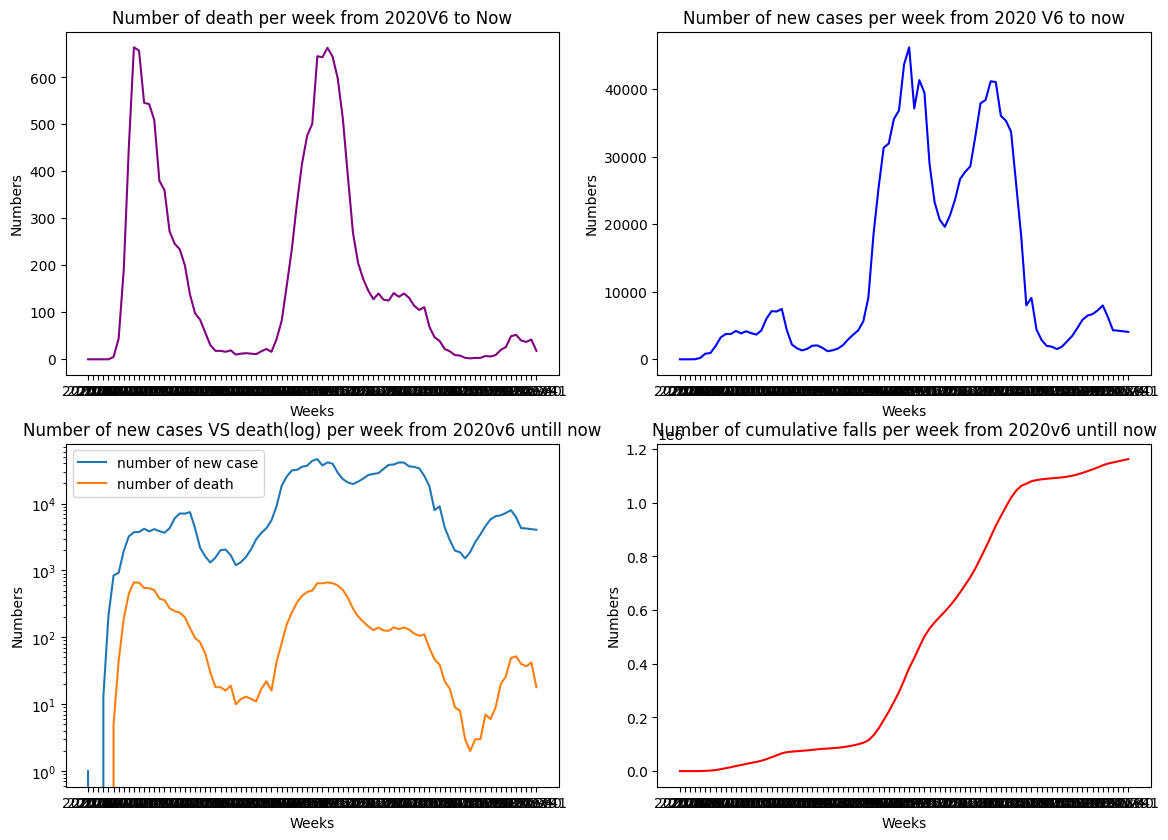

In [18]:
# this code reference from kun's work
# https://github.com/cooperhankun/DataBehandling-KunHan/blob/main/Labs/lab1-SWE.ipynb
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax=plt.subplots(2, 2,figsize=(14,10),dpi=100)

sns.lineplot( data=Covid19,
              x="Vecka",
              y="Antal_avlidna_vecka",
              color="purple",
              ax=ax[0,0]).set(title="Number of death per week from 2020V6 to Now",
              xlabel="Weeks",
              ylabel="Numbers" )
              #hue=""
            

sns.lineplot(data=Covid19,
              x="Vecka",
              y="Antal_fall_vecka",
              color="blue",
              ax=ax[0,1]).set(title="Number of new cases per week from 2020 V6 to now",
              xlabel="Weeks",
              ylabel="Numbers" )
            

sns.lineplot( data=Covid19,
              x="Vecka",        
              y="Antal_fall_vecka", 
              ax=ax[1,0])

sns.lineplot( data=Covid19,
              x="Vecka",        
              y="Antal_avlidna_vecka", 
              ax=ax[1,0]).set(title="Number of new cases VS death(log) per week from 2020v6 untill now", 
              xlabel="Weeks", 
              ylabel="Numbers")
ax[1,0].legend(labels=["number of new case","number of death"])
ax[1,0].set_yscale('log') 
                       

sns.lineplot(data=Covid19, 
             x="Vecka",
             y="Kum_antal_fall", 
             color="red", 
             ax=ax[1,1]).set(title="Number of cumulative falls per week from 2020v6 untill now",
             xlabel="Weeks", 
             ylabel="Numbers")                                           

# Method 2 Line Plot Using Plotly.express

# c)

In [37]:
import plotly_express as px
import plotly.graph_objects as go
fig=px.line(Covid19,x="Vecka",y="Antal_avlidna_vecka",title="Number of death per week from 2020V6 to Now",)
fig.show()

# d)

In [38]:
fig=px.line(Covid19,x="Vecka",y="Antal_fall_vecka",title="Number of new cases per week from 2020 V6 to now")
fig.show()

# e)

In [39]:
# How to plot multiple lines on the same y-axis using plotly express?
# Reference: https://community.plotly.com/t/how-to-plot-multiple-lines-on-the-same-y-axis-using-plotly-express/29219/13
fig=px.line(Covid19,x="Vecka",y=["Antal_fall_vecka","Antal_avlidna_vecka"],
             title="Numbers of new_cases VS deaths per week from 2020 V6 to now")

fig.show()

# f)

In [40]:
fig=px.line(Covid19,x="Vecka",y="Kum_antal_fall",title="Number of cumulative falls per week from 2020v6 untill now")
fig.show()          

# Uppgift 2 - uppvärmning vaccindata 

In [21]:
# Vaccine data was downloaded from the link:
Vaccine= pd.read_excel("Folkhalsomyndigheten_Covid19_Vaccine.xlsx",sheet_name=5) #read sixth excel blad. or sheet_name="Vaccinerade kommun och ålder") 
Vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,1,Stockholm,114,Upplands Väsby,16-17,1122,671,450,0.598039,0.401070
1,1,Stockholm,114,Upplands Väsby,18-29,6428,4174,3324,0.649347,0.517113
2,1,Stockholm,114,Upplands Väsby,30-39,7088,4976,4341,0.702032,0.612444
3,1,Stockholm,114,Upplands Väsby,40-49,6802,5308,5010,0.780359,0.736548
4,1,Stockholm,114,Upplands Väsby,50-59,6185,5360,5190,0.866613,0.839127


# a) 
# Hur många län finns representerade i datasetet? 

In [22]:
Vaccine["Län_namn"].unique()
#Vaccine["Län_namn"].nunique()
# diffenent between "unique" and "nunique" 
#nunique: return number of unique elements 即返回的是唯一值的个数

array(['Stockholm', 'Uppsala', 'Södermanland', 'Östergötland',
       'Jönköping', 'Kronoberg', 'Kalmar', 'Gotland', 'Blekinge', 'Skåne',
       'Halland', 'Västra Götaland', 'Värmland', 'Örebro', 'Västmanland',
       'Dalarna', 'Gävleborg', 'Västernorrland', 'Jämtland',
       'Västerbotten', 'Norrbotten'], dtype=object)

In [23]:
Vaccine["Län_namn"].unique().__len__()
Vaccine["Län_namn"].nunique() # second method

#Vaccine.Län_namn.unique().__len__() 

21

In [44]:
# for the purpose to look even more clearly 
Läns=Vaccine["Län_namn"].nunique()
print(f"There are {Läns} Läns in this dataset.")

There are 21 Läns in this dataset.


# b) 
# Hur många kommuner finns representerade i datasetet?

In [45]:
Vaccine["Kommun_namn"].nunique()
#Vaccine["Kommun_namn"].unique().__len__()

290

In [46]:
Kommun=Vaccine["Kommun_namn"].nunique()
print(f"There are {Kommun} Kommuns in this dataset.")

There are 290 Kommuns in this dataset.


# c) 
# Hur stor är befolkningen som är representerad i datasetet? 

In [47]:
Vaccine["Befolkning"].sum()

8541497

In [48]:
Sum_people=Vaccine["Befolkning"].sum()
print(f"There are total {Sum_people} peoples in this dataset.")

There are total 8541497 peoples in this dataset.


# d) 
# Beräkna hur många barn under 16 år det finns i Sverige. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.

计算瑞典有多少 16 岁以下的儿童。 您可以查找有关瑞典总人口数量的统计数据。

In [24]:
# data link:https://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101A/BefolkManad/
# I download data from this link ,save to xlsx file.
# select age <=16 years old.
import pandas as pd
Children_16 = pd.read_excel("population_under_16.xlsx")
Children_16.head(8)

,"Population per month by region, age, sex and month",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2021M08
2,00 Sweden,0 years,men,40419
3,NaN,NaN,women,38557
4,NaN,1 year,men,58985
5,NaN,NaN,women,55620
6,NaN,2 years,men,60421
7,NaN,NaN,women,56840


In [25]:
Children_16=Children_16.drop([0,1]) #Remove the first two rows.
Children_16_total=Children_16["Unnamed: 3"].sum()
print(f"There are totally {Children_16_total} children under 16 years old  in Sweden")

There are totally 2040480 children under 16 years old  in Sweden


# e) 
# Rita stapeldiagram för andel med minst 1 dos per län och andel färdigvaccinerade per län 


In [26]:
Vaccine_lan=Vaccine.groupby(["Län_namn"])[["Befolkning", "Antal minst 1 dos", "Antal färdigvaccinerade"]].sum()
# Each lan's total people who got 1 dos / totally pupulation in this lan

Vaccine_lan["Andel minst 1 dos"] = (Vaccine_lan["Antal minst 1 dos"]/Vaccine_lan["Befolkning"]) # create a new colomn "Andel minst 1 dos".
Vaccine_lan["Andel färdigvaccinerade"] = (Vaccine_lan["Antal färdigvaccinerade"]/Vaccine_lan["Befolkning"]) # create a new colomn"Andel färdigvaccinerade".
Vaccine_lan

,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
Län_namn,,,,,
Blekinge,132463,114711,110497,0.865985,0.834173
Dalarna,238920,207596,198688,0.868893,0.831609
Gotland,50863,46143,44359,0.907202,0.872127
Gävleborg,239812,205563,193853,0.857184,0.808354
Halland,275840,239400,230634,0.867894,0.836115
Jämtland,108953,95357,90406,0.875212,0.829771
Jönköping,298157,252915,238710,0.848261,0.800618
Kalmar,205281,178030,170670,0.867250,0.831397
Kronoberg,165291,138254,130930,0.836428,0.792118


In [29]:
import plotly_express as px
px.bar(Vaccine_lan, x=Vaccine_lan.index, y="Andel minst 1 dos", title="Andel med minst 1 dos per län")

ModuleNotFoundError: No module named 'plotly_express'

In [30]:
px.bar(Vaccine_lan, x=Vaccine_lan.index, y="Andel färdigvaccinerade", title="Andel färdigvaccinerade per län")

NameError: name 'px' is not defined

In [31]:
 
import plotly.graph_objects as go
fig = go.Figure()

fig.add_bar(x=Vaccine_lan.index, 
            y=Vaccine_lan["Andel minst 1 dos"],
            name="Andel med minst 1 dos per län")

fig.add_bar(x=Vaccine_lan.index, 
            y=Vaccine_lan["Andel färdigvaccinerade"], 
            name="Andel färdigvaccinerade per län")
           

fig.update_layout(xaxis_title='Län',
                  yaxis_title='Andel',
                  title="Andel med minst 1 dos VS färdigvaccinerade per län")
                  
fig.update_traces(textposition='outside')
fig.show()


In [32]:
# I tried second method
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2,subplot_titles=[ "Andel färdigvaccinerade","Andel med minst 1 dos per län"])

fig.add_trace(go.Bar(x=Vaccine_lan.index,
                     y=Vaccine_lan["Andel färdigvaccinerade"], 
                     name="Number of fully vaccinated"),
                     row=1, col=1)

fig.add_trace(go.Bar(x=Vaccine_lan.index,
                     y=Vaccine_lan["Andel minst 1 dos"],
                     name="Number of at least 1 dose"),
                     row=1, col=2)

fig.show()
# reference:https://stackoverflow.com/questions/59623856/offline-plotly-generate-bar-chart-of-2-columns-on-y-axis-1-column-on-x-ax

# f) 
Rita ett stapeldiagram med län i x-axeln och staplar för befolkning > 16år, antal minst 1 dos och antal färdigvaccinerade.

In [33]:
# Need to fix it here ,come back later !!!!!!!!!!!!!!!!!!!!!!!!
import plotly.graph_objects as go

fig = go.Figure()


"""fig.add_bar(x=Vaccine_lan.index, 
            y=Vaccine_lan["Befolkning"], 
            name="Befolkning större med 16 år")"""
             
fig.add_bar(x=Vaccine_lan.index, 
            y=Vaccine_lan["Antal minst 1 dos"], 
            name="Antal minst 1 dos per län")

fig.add_bar(x=Vaccine_lan.index, 
            y=Vaccine_lan["Antal färdigvaccinerade"],
            name="Antal färdigvaccinerade per län")

fig.update_layout(xaxis_title='Län',
                  yaxis_title='Andel',
                  title=" För befolkning > 16år,antal minst 1 dos och antal färdigvaccinerade" )
                   

fig.update_traces(textposition='outside')

fig.show()            

# Uppgift 3 - KPIer & explorativ dataanalys

1: Explore if female and male have same fatality rate,virus COVID-19 is more dangers for man than woman?

In [34]:
avlidna_kön = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Totalt antal per kön").drop([2]) # remove missing value
avlidna_kön

,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Man,572662,5525,8204
1,Kvinna,592482,2366,6785


In [35]:
avlidna_kön = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Totalt antal per kön").drop([2]) # remove missing value
avlidna_kön["Fatality rate by gender"]=avlidna_kön["Totalt_antal_avlidna"]/avlidna_kön["Totalt_antal_fall"]*100

fig=px.bar(avlidna_kön,x="Kön",y="Fatality rate by gender",title="Fatality tates by gender (%) ") #不同的国家不同的颜色
fig.show()


NameError: name 'px' is not defined

2. Distribution of cases fatality rates among different age groups 不同年龄组病死率分布

In [59]:
# Refenrence kun's work: https://github.com/cooperhankun/DataBehandling-KunHan/blob/main/Labs/lab1-SWE.ipynb
covid19_age_group = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Totalt antal per åldersgrupp")
covid19_age_group 

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Ålder_0_9,34712,37,9
1,Ålder_10_19,161969,53,4
2,Ålder_20_29,203237,213,25
3,Ålder_30_39,205699,368,46
4,Ålder_40_49,209750,861,124
5,Ålder_50_59,180559,1707,387
6,Ålder_60_69,91133,2251,1064
7,Ålder_70_79,41937,1958,3362
8,Ålder_80_89,25481,436,6082
9,Ålder_90_plus,11372,10,3890


In [60]:
covid19_age_group["Fatality rate"] = covid19_age_group["Totalt_antal_avlidna"]/covid19_age_group["Totalt_antal_fall"]*100

# using sns plot
# fig, ax = plt.subplots(figsize=(13,6))
# sns.pointplot(data=covid19_age_group, x="Åldersgrupp", y="Fatality rate", color="blue").set(title="Fatality tates (%) in different age groups", xlabel="Age groups")

fig=px.line(covid19_age_group, x="Åldersgrupp", y="Fatality rate",title="Fatality tates (%) in different age groups")
fig.show()

# 3.the number of vaccinationer by week for whole sweden()

In [61]:
import pandas as pd
Antal_vaccinationer=pd.read_excel("Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinationer tidsserie")
Antal_vaccinationer

,Vecka,År,Region,Antal vaccinationer
0,52,2020,| Sverige |,2472
1,52,2020,Stockholm,288
2,52,2020,Uppsala,8
3,52,2020,Södermanland,116
4,52,2020,Östergötland,214
...,...,...,...,...
941,41,2021,Gävleborg,400931
942,41,2021,Västernorrland,353992
943,41,2021,Jämtland,187873
944,41,2021,Västerbotten,403377


In [62]:
# change type from int to str
Antal_vaccinationer["Vecka"]=Antal_vaccinationer["Vecka"].astype(str)
Antal_vaccinationer["År"]=Antal_vaccinationer["År"].astype(str)

#Create a new column"vecka" with Combining column "år" and column"veckonummer" 合并两列到一列方法一
Antal_vaccinationer["Vecka_år"]=(Antal_vaccinationer["År"]+"V"+Antal_vaccinationer["Vecka"])
Antal_vaccinationer

,Vecka,År,Region,Antal vaccinationer,Vecka_år
0,52,2020,| Sverige |,2472,2020V52
1,52,2020,Stockholm,288,2020V52
2,52,2020,Uppsala,8,2020V52
3,52,2020,Södermanland,116,2020V52
4,52,2020,Östergötland,214,2020V52
...,...,...,...,...,...
941,41,2021,Gävleborg,400931,2021V41
942,41,2021,Västernorrland,353992,2021V41
943,41,2021,Jämtland,187873,2021V41
944,41,2021,Västerbotten,403377,2021V41


In [63]:
Antal_vaccinationer.loc[Antal_vaccinationer["Region"] == "| Sverige |"].reset_index(drop=True)

,Vecka,År,Region,Antal vaccinationer,Vecka_år
0,52,2020,| Sverige |,2472,2020V52
1,53,2020,| Sverige |,16529,2020V53
2,1,2021,| Sverige |,52934,2021V1
3,2,2021,| Sverige |,132235,2021V2
4,3,2021,| Sverige |,244991,2021V3
5,4,2021,| Sverige |,327907,2021V4
6,5,2021,| Sverige |,416491,2021V5
7,6,2021,| Sverige |,525454,2021V6
8,7,2021,| Sverige |,673633,2021V7
9,8,2021,| Sverige |,826300,2021V8


In [64]:
import plotly_express as px 
fig=px.line(Antal_vaccinationer, x="Vecka_år", y="Antal vaccinationer",title="the number of vaccinationer by week for whole sweden")
fig.show()

In [65]:
4. I want to see if vaccination status (1 Dos  VS 2 Dos )and Covid19 fatality rate is a negative correlation

SyntaxError: invalid syntax (Temp/ipykernel_9656/133131069.py, line 1)

In [ ]:
4. The impact of vaccination to control COVID-19. (Weekly cases vs. total vaccineded)
 疫苗接种对控制 COVID-19 的影响。 （每周病例数与接种疫苗总数）

In [ ]:
5. Total proportion of vaccineded Dose-1 and Dose-2 in different age groups 不同年龄组接种 Dose-1 和 Dose-2 的总比例

# Uppgift 4 (bonusuppgift) 
Följ länkarna från FHM för att komma till ECDC, WHO och undersök Covid-19 globalt. Dokumentera vad du undersöker och vad du kommer fram till. Notera att du får navigera och läsa till dig i deras hemsidor för att hitta relevant data.

按照 FHM 的链接访问 ECDC、WHO 并在全球范围内调查 Covid-19。 记录您正在调查的内容以及您得出的结论。 请注意，您可以在他们的网站上导航并阅读他们以查找相关数据。